# Prosper Loan Data Exploration

## Investigation Overview

In this investigation, I looked at the characteristics of loan dataset that could be used to predict the loan status outcome and interest rate. The main focus was on the LoanOriginalAmount, CreditScoreRangeLower, StatedMonthlyIncome and DebtToIncomeRatio.

## Dataset Overview

This document explores a dataset containing loan information of approximately 113938 loans with 81 attributes. 66 columns were ignored since they were not necessary in our prediction. 9,940 data points were removed from analysis due to inconsistencies or missing information.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')
#print(loan.shape)

# Remove columns that are not necessary in this analysis by dropping it
loandf = loan.copy()
loandf.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatusDuration', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'IncomeRange', 'IncomeVerifiable', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors'], axis = 1, inplace = True) 

# Remove duplicated rows, keeping just the first out of 2 or more duplicated value
loandf.drop_duplicates(keep = 'first', inplace = True)

# If 'StatedMonthlyIncome' = 0, then we can drop these incomplete data since it does not make sense to predict loan repayment based on 0 income
index_names = loandf[loandf.StatedMonthlyIncome == 0 ].index
loandf.drop(index_names, inplace = True)

# Remove rows with no/missing (NaN) DebtToIncomeRatio value
index_names = loandf[loandf.DebtToIncomeRatio.isnull()].index
loandf.drop(index_names, inplace = True)

# In OpenCreditLines column,replace NaN value with 0
loandf.OpenCreditLines = loandf.OpenCreditLines.fillna(0)

# remove rows with CreditScoreRangeLower = NaN, since it does not help in predicting interest rate when credit score is missing.
index_names = loandf[loandf.CreditScoreRangeLower.isnull()].index
loandf.drop(index_names, inplace = True)

# In ProsperPaymentsOneMonthPlusLate column,replace NaN value with 0
loandf.ProsperPaymentsOneMonthPlusLate = loandf.ProsperPaymentsOneMonthPlusLate.fillna(0)

# convert ProsperPaymentsOneMonthPlusLate column values to int values
loandf.ProsperPaymentsOneMonthPlusLate = loandf.ProsperPaymentsOneMonthPlusLate.astype(int)

# Rows and columns in the  dataset
print(loandf.shape)

(103998, 15)


## Distribution of Loan Status

Loan status in the dataset takes up 12 different status. Plotted on Bar chart, the distribution is mainly among 4 status.

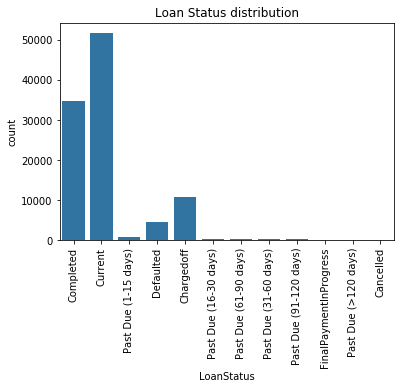

In [4]:
# Distribution plot of LoanStatus in a bar chart
base_color = sb.color_palette()[0]
sb.countplot(data = loandf, x = 'LoanStatus', color = base_color)
plt.xticks(rotation = 90);
plt.title('Loan Status distribution');

## Distribution of Interest Rate

Interest Rate/BorrowerRate in the dataset takes up values from .05 to .35. The histogram plot of the distribution is roughly unimodal with a high spike making it right skewed.

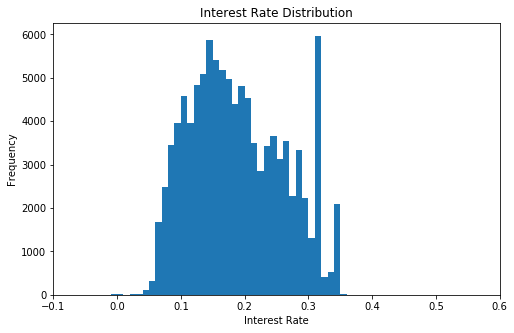

In [5]:
# Distribution plot of BorrowerRate
binsize = .01
bins = np.arange(-1, loandf['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandf, x = 'BorrowerRate', bins = bins)
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Interest Rate Distribution')
plt.xlim((-.1,.6))
plt.show()